## Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [12]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.

a. Read in the dataset and take a look at the top few rows here:

In [13]:
df = pd.read_csv('ab_data.csv', encoding='ISO-8859-1')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [14]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [15]:
df.nunique().user_id

290584

d. The proportion of users converted.

In [16]:
df.converted.mean()*100

11.96591935560551

e. The number of times the `new_page` and `treatment` don't line up.

In [17]:
#group = "treatment" and user when lands on "old_page"
user1 = df.query('group == "treatment" & landing_page == "old_page"').count
print (user1)
#group = "control" and user when lands on "new_page"
user2 = df.query('group == "control" & landing_page == "new_page"').count
print (user2)
#The number of times the new_page and treatment don't line up is summation of user1 & user2 i.e 1965+1928 = 3893


<bound method DataFrame.count of         user_id                   timestamp      group landing_page  converted
308      857184  2017-01-20 07:34:59.832626  treatment     old_page          0
327      686623  2017-01-09 14:26:40.734775  treatment     old_page          0
357      856078  2017-01-12 12:29:30.354835  treatment     old_page          0
685      666385  2017-01-23 08:11:54.823806  treatment     old_page          0
713      748761  2017-01-10 15:47:44.445196  treatment     old_page          0
776      820951  2017-01-04 02:42:54.770627  treatment     old_page          0
889      839954  2017-01-06 20:58:22.280929  treatment     old_page          0
1037     880442  2017-01-07 21:42:39.026815  treatment     old_page          0
1106     817911  2017-01-17 21:51:43.220160  treatment     old_page          0
1376     844475  2017-01-20 14:25:37.359614  treatment     old_page          0
1551     838336  2017-01-14 22:05:24.310302  treatment     old_page          0
1706     916207  20

f. Do any of the rows have missing values?

In [18]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [19]:
#Dropping where treatment is not aligned with new_page or control is not aligned with old_page
df.drop(df.query("group == 'treatment' and landing_page == 'old_page'").index, inplace=True)
df.drop(df.query("group == 'control' and landing_page == 'new_page'").index, inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 10.0+ MB


In [21]:
#Saving the new dataset
df.to_csv('ab_cleaned.csv', index=False)

In [22]:
#Loading the dataset in new dataframe df2
df2 = pd.read_csv('ab_cleaned.csv')

In [23]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [24]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [25]:
sum(df2['user_id'].duplicated())

1

c. What is the row information for the repeat **user_id**? 

In [26]:
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1876,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [27]:
#Removing index = 2862:
df2 = df2.drop(df2.index[2862])

In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 290584
Data columns (total 5 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(2), object(3)
memory usage: 10.0+ MB


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [29]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [30]:
df_group = df2.groupby('group')
df_group.describe()

converted                                                user_id  \
              count      mean       std  min  25%  50%  75%  max     count   
group                                                                        
control    145274.0  0.120386  0.325414  0.0  0.0  0.0  0.0  1.0  145274.0   
treatment  145310.0  0.118808  0.323564  0.0  0.0  0.0  0.0  1.0  145310.0   

                                                                       \
                    mean           std       min        25%       50%   
group                                                                   
control    788164.072594  91287.914601  630002.0  709279.50  788128.5   
treatment  787845.719290  91161.564429  630000.0  708745.75  787876.0   

                                
                 75%       max  
group                           
control    867208.25  945998.0  
treatment  866718.75  945999.0

In [31]:
#As seen from above describe function,
#An individual was in the control group,the probability they converted = 0.120386

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [32]:
#As seen from above describe function,
#An individual was in the treatment group,the probability they converted = 0.118808

d. What is the probability that an individual received the new page?

In [33]:
df2.query('landing_page == "new_page"').count

<bound method DataFrame.count of         user_id                   timestamp      group landing_page  converted
2        661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3        853541  2017-01-08 18:28:03.143765  treatment     new_page          0
6        679687  2017-01-19 03:26:46.940749  treatment     new_page          1
8        817355  2017-01-04 17:58:08.979471  treatment     new_page          1
9        839785  2017-01-15 18:11:06.610965  treatment     new_page          1
10       929503  2017-01-18 05:37:11.527370  treatment     new_page          0
11       834487  2017-01-21 22:37:47.774891  treatment     new_page          0
12       803683  2017-01-09 06:05:16.222706  treatment     new_page          0
13       944475  2017-01-22 01:31:09.573836  treatment     new_page          0
14       718956  2017-01-22 11:45:11.327945  treatment     new_page          0
17       888545  2017-01-08 06:37:26.332945  treatment     new_page          1
20       740805  20

In [34]:
#total number of users
df2.shape[0]

290584

In [ ]:
#probability that an individual received the new page is (145310/290584) = 0.50006

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

#### Hypothesis:

$$H_0: p_{old} >= p_{new}$$


$$H_1: p_{new} > p_{old}$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [35]:
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [36]:
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [44]:
n_new = len(df2.query("group == 'treatment'"))
(n_new)

145310

d. What is $n_{old}$?

In [45]:
n_old = len(df2.query("group == 'control'"))
(n_old)

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [46]:
new_page_converted = np.random.choice([0,1] , size = n_new, p=[p_new, (1-p_new)])
len(new_page_converted)

145310

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [48]:
old_page_converted = np.random.choice([0,1] , size = n_old, p=[p_old, (1-p_old)])
len(old_page_converted)

145274

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [49]:
#There is a difference between len(new_page_converted) and len(old_page_converted).So taking the values upto length 145274 in new_page_converted
new_page_converted = new_page_converted[:145274]

In [51]:
p_diff = (new_page_converted/n_new) - (old_page_converted/n_old)
p_diff

array([ -1.70537190e-09,  -1.70537190e-09,  -1.70537190e-09, ...,
        -1.70537190e-09,  -1.70537190e-09,  -1.70537190e-09])

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [55]:
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new, (1-p_new)]).mean()
    old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_old, (1-p_old)]).mean()
    diff = new_page_converted - old_page_converted 
    p_diffs.append(diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

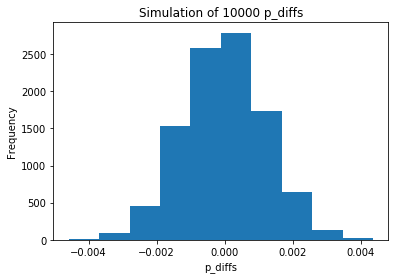

In [56]:
plt.hist(p_diffs);
plt.xlabel('p_diffs')
plt.ylabel('Frequency')
plt.title('Simulation of 10000 p_diffs');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [57]:
# Calculating the difference from ab_data.csv
actual_diff = df[df['group'] == 'treatment']['converted'].mean() -  df[df['group'] == 'control']['converted'].mean()
actual_diff

-0.0015790565976871451

In [63]:
p_diffs = np.array(p_diffs)
p_diffs

array([-0.00135122, -0.00188804, -0.00147498, ...,  0.00173906,
       -0.00103466, -0.00312   ])

In [65]:
#Proportion of the p_diffs greater than the actual difference observed in ab_data.csv
(actual_diff < p_diffs).mean()

0.9052

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

1.We have calculated p-value here.

2.It is the probability of observing our statistic (or one more extreme in favor of the alternative) if the null hypothesis is true.

3.As from p-value (p - value is greater than alpha), we select null hypothesis and reject alternate hypothesis.I conclude that the old page is better.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [66]:
import statsmodels.api as sm

convert_old = sum(df2.query("group == 'control'")['converted'])
convert_new = sum(df2.query("group == 'treatment'")['converted'])
n_old = len(df2.query("group == 'control'"))
n_new = len(df2.query("group == 'treatment'")) 

C:\Users\ashish\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [68]:
print(convert_old,convert_new,n_old,n_new)

17489 17264 145274 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [73]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print(z_score, p_value)

1.31092419842 0.905058312759


In [74]:
from scipy.stats import norm

print(norm.cdf(z_score))
# Tells us how significant our z-score is

print(norm.ppf(1-(0.05)))
# Tells us what our critical value at 95% confidence is

0.905058312759
1.64485362695


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

1.The z-score (1.31092419842) is less than the critical value (1.64485362695). So, we are accepting the null hypothesis.

2.Yes,it agrees with the findings in parts j. and k.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

###### Logistic Regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [75]:
df['intercept']=1

In [76]:
#adding dummy coloumn
df[['control', 'treatment']] = pd.get_dummies(df['group'])

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [77]:
import statsmodels.api as sm
logit = sm.Logit(df['converted'],df[['intercept','treatment']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [78]:
result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Sun, 21 Jan 2018   Pseudo R-squ.:               8.085e-06
Time:                        16:34:57   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1897
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
treatment     -0.0150      0.011     -1.312      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

#### Hypothesis:

 $$H_0: p_{old} - p_{new}  == 0$$
 $$H_1: p_{new} - p_{old}   != 0$$

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

##### Answer:
We can consider other factors because it might give positive response to you analysis.Suppose if you want to know which screen size mobile phone is famous in market 5 or 5.5 inch.You may take the dataset and calculate the proportion of both screen sizes and you will come to know.But that might be not the case in every city.Different tiers of cities may be having different liking.Here region lays a vital role.

##### Disadvantages:
There may be situation even by adding factor (any variable) you cannot get best result as there was no research done why to accomodate this variable. 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [79]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [80]:
df_new.head()

,country,timestamp,group,landing_page,converted
user_id,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0


In [84]:
df_new['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [86]:
### Creating the necessary dummy variables
df_new[['UK', 'US']] = pd.get_dummies(df_new['country'])[['UK','US']]

df_new.head()

,country,timestamp,group,landing_page,converted,UK,US
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0


In [88]:
df_new['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [89]:
### Fit Your Linear Model And Obtain the Results
df['intercept'] = 1

log_mod = sm.Logit(df_new['converted'], df_new[['UK', 'US']])
result = log_mod.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.382864
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 21 Jan 2018   Pseudo R-squ.:                -0.04573
Time:                        18:15:51   Log-Likelihood:            -1.1125e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
UK            -1.9868      0.011   -174.174      0.000      -2.009      -1.964
US            -1.9967      0.007   -292.314      0.000      -2.010      -1.983
==============================================================================
"""

In [91]:
np.exp(result.params)

UK    0.137132
US    0.135779
dtype: float64

In [93]:
df.groupby('group').mean()['converted']

group
control      0.120386
treatment    0.118807
Name: converted, dtype: float64

#### Logistic Regression Model Conclusion:

1.In the logistic regression model, we see that the values for conversion rates for control group and treatment group are having a minute difference nothing major.

2.From this we can say that we can select Null Hypothesis.

<a id='conclusions'></a>
## Conclusions

1.The 'old page' is performing better then the 'new page' though there is very little difference(we saw in above tests).

2.So we could reject Alternate Hypothesis and select Null Hypothesis.

##### So we have met conclusion that the e-commerce website should move with old page now as there is no much of difference between the two. They may do some tweaks in there new page and run the experiment to make their decision.